In [1]:
#import library
import cv2 #opencv image
import numpy as np #array
import string
import os
import matplotlib.pyplot as plt

In [2]:
#ASCII CONVERSION
d={chr(i):i for i in range(255)}  #character to ascii
c={i:chr(i) for i in range(255)}  #ascii to caharacter

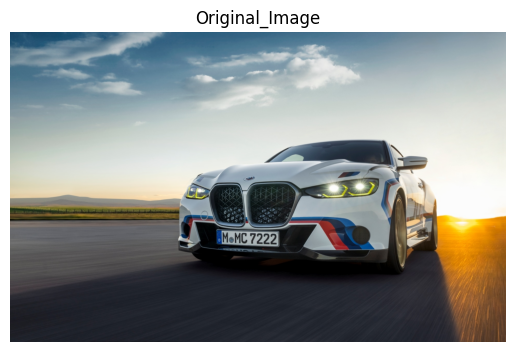

In [4]:
#Load the image
image_path=r"/content/bmw.jpg"
x=cv2.imread(image_path)
xrgb=cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
plt.imshow(xrgb)
plt.title("Original_Image")
plt.axis('off')
plt.show()


In [5]:
x.shape

(1200, 1920, 3)

In [7]:
key="6789026373"
text="the organization"

In [8]:
# ASCII Values
text_ascii=[d[ch] for ch in text]  #list of ascii values of text characters
key_ascii=[d[ch] for ch in key]    #list of ascii values of key
print(text_ascii)
print(key_ascii)

[116, 104, 101, 32, 111, 114, 103, 97, 110, 105, 122, 97, 116, 105, 111, 110]
[54, 55, 56, 57, 48, 50, 54, 51, 55, 51]


In [9]:
#encrypt using pixel modelfication
x_enc=x.copy()
n=0  #number of rows
m=0  #number of coloumns
z=0  #colour panel
l=len(text)
kl=0
for i in range(l):
    orig_val=x_enc[n,m,z]
    new_val=d[text[i]]^d[key[kl]]  #important
    x_enc[n,m,z]=new_val
    print(f"Embedding '{text[i]}' (ASCII {d[text[i]]}) XOR '{key[kl]}' (ASCII {d[key[kl]]}) = {new_val} at pixel ({n},{m},{z}) [original={orig_val}]")
    n=n+1
    m=m+1
    m=(m+1)%3
    z=(z+1)%3
    kl=(kl+1)%len(key)


Embedding 't' (ASCII 116) XOR '6' (ASCII 54) = 66 at pixel (0,0,0) [original=104]
Embedding 'h' (ASCII 104) XOR '7' (ASCII 55) = 95 at pixel (1,2,1) [original=70]
Embedding 'e' (ASCII 101) XOR '8' (ASCII 56) = 93 at pixel (2,1,2) [original=26]
Embedding ' ' (ASCII 32) XOR '9' (ASCII 57) = 25 at pixel (3,0,0) [original=104]
Embedding 'o' (ASCII 111) XOR '0' (ASCII 48) = 95 at pixel (4,2,1) [original=69]
Embedding 'r' (ASCII 114) XOR '2' (ASCII 50) = 64 at pixel (5,1,2) [original=23]
Embedding 'g' (ASCII 103) XOR '6' (ASCII 54) = 81 at pixel (6,0,0) [original=102]
Embedding 'a' (ASCII 97) XOR '3' (ASCII 51) = 82 at pixel (7,2,1) [original=70]
Embedding 'n' (ASCII 110) XOR '7' (ASCII 55) = 89 at pixel (8,1,2) [original=23]
Embedding 'i' (ASCII 105) XOR '3' (ASCII 51) = 90 at pixel (9,0,0) [original=104]
Embedding 'z' (ASCII 122) XOR '6' (ASCII 54) = 76 at pixel (10,2,1) [original=71]
Embedding 'a' (ASCII 97) XOR '7' (ASCII 55) = 86 at pixel (11,1,2) [original=26]
Embedding 't' (ASCII 116)

In [10]:
cv2.imwrite("encrypt.jpg",x_enc)

True

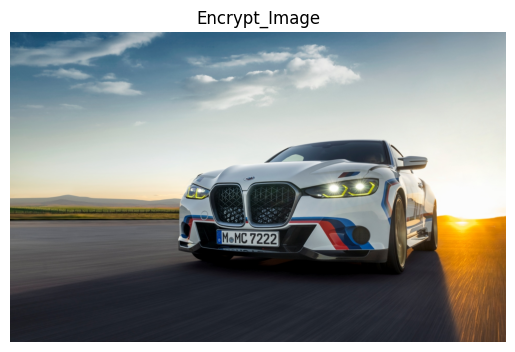

In [14]:
plt.imshow(cv2.cvtColor(x_enc,cv2.COLOR_BGR2RGB))
plt.title("Encrypt_Image")
plt.axis('off')
plt.show()

In [15]:
#Decrypt
n,m,z=0,0,0
kl=0
decrypt=""
for i in range(l):
    val=x_enc[n,m,z]
    orig_char=c[val^d[key[kl]]]
    decrypt=decrypt+orig_char

    print(f"Decrypting pixel ({n},{m},{z}): {val} XOR {d[key[kl]]} = {val ^ d[key[kl]]} -> '{orig_char}'")

    n=n+1
    m=m+1
    m=(m+1)%3
    z=(z+1)%3
    kl=(kl+1)%len(key)
print(decrypt)


Decrypting pixel (0,0,0): 66 XOR 54 = 116 -> 't'
Decrypting pixel (1,2,1): 95 XOR 55 = 104 -> 'h'
Decrypting pixel (2,1,2): 93 XOR 56 = 101 -> 'e'
Decrypting pixel (3,0,0): 25 XOR 57 = 32 -> ' '
Decrypting pixel (4,2,1): 95 XOR 48 = 111 -> 'o'
Decrypting pixel (5,1,2): 64 XOR 50 = 114 -> 'r'
Decrypting pixel (6,0,0): 81 XOR 54 = 103 -> 'g'
Decrypting pixel (7,2,1): 82 XOR 51 = 97 -> 'a'
Decrypting pixel (8,1,2): 89 XOR 55 = 110 -> 'n'
Decrypting pixel (9,0,0): 90 XOR 51 = 105 -> 'i'
Decrypting pixel (10,2,1): 76 XOR 54 = 122 -> 'z'
Decrypting pixel (11,1,2): 86 XOR 55 = 97 -> 'a'
Decrypting pixel (12,0,0): 76 XOR 56 = 116 -> 't'
Decrypting pixel (13,2,1): 80 XOR 57 = 105 -> 'i'
Decrypting pixel (14,1,2): 95 XOR 48 = 111 -> 'o'
Decrypting pixel (15,0,0): 92 XOR 50 = 110 -> 'n'
the organization
